# Introduction:
The selected dataset that has been selected is the healthcare Diabetes dataset. In which the problem we are trying to solve is determining which three factors are the most likley to cause a postive diabetes diagnosis, as well as the least likely cause a positive diagnosis.  



# Data Pre-processing and EDA
First we will import the neccesary libaries to work with the dataset and load the data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Load the dataset
df = pd.read_csv("./Healthcare-Diabetes.csv")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


Next we drop any unneeded columns and check for any null values. 0 values are allowed in this dataset therefore we do not need to remove them. we do this by naming the column id 

In [5]:
# Drop unnecessary columns
df.drop(columns=['Id'], inplace=True)
# Handling missing null values using median imputation
df.fillna(df.median(), inplace=True)
#View changes
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


for the last step of the Pre-processing stage, we ensure all the data in the remaining columns is the correct datatype. this is to stop any type errors occuring when we plot/analyse the data.

In [6]:
# Ensure all numeric columns are correctly formatted
num_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

Next we complete the EDA analysis, in this section we will be looking at the data as a whole, attempting to identify any frequent patterns and correlations between the features and their outcome.

Create histograms showing distrobution all all data colulmns  

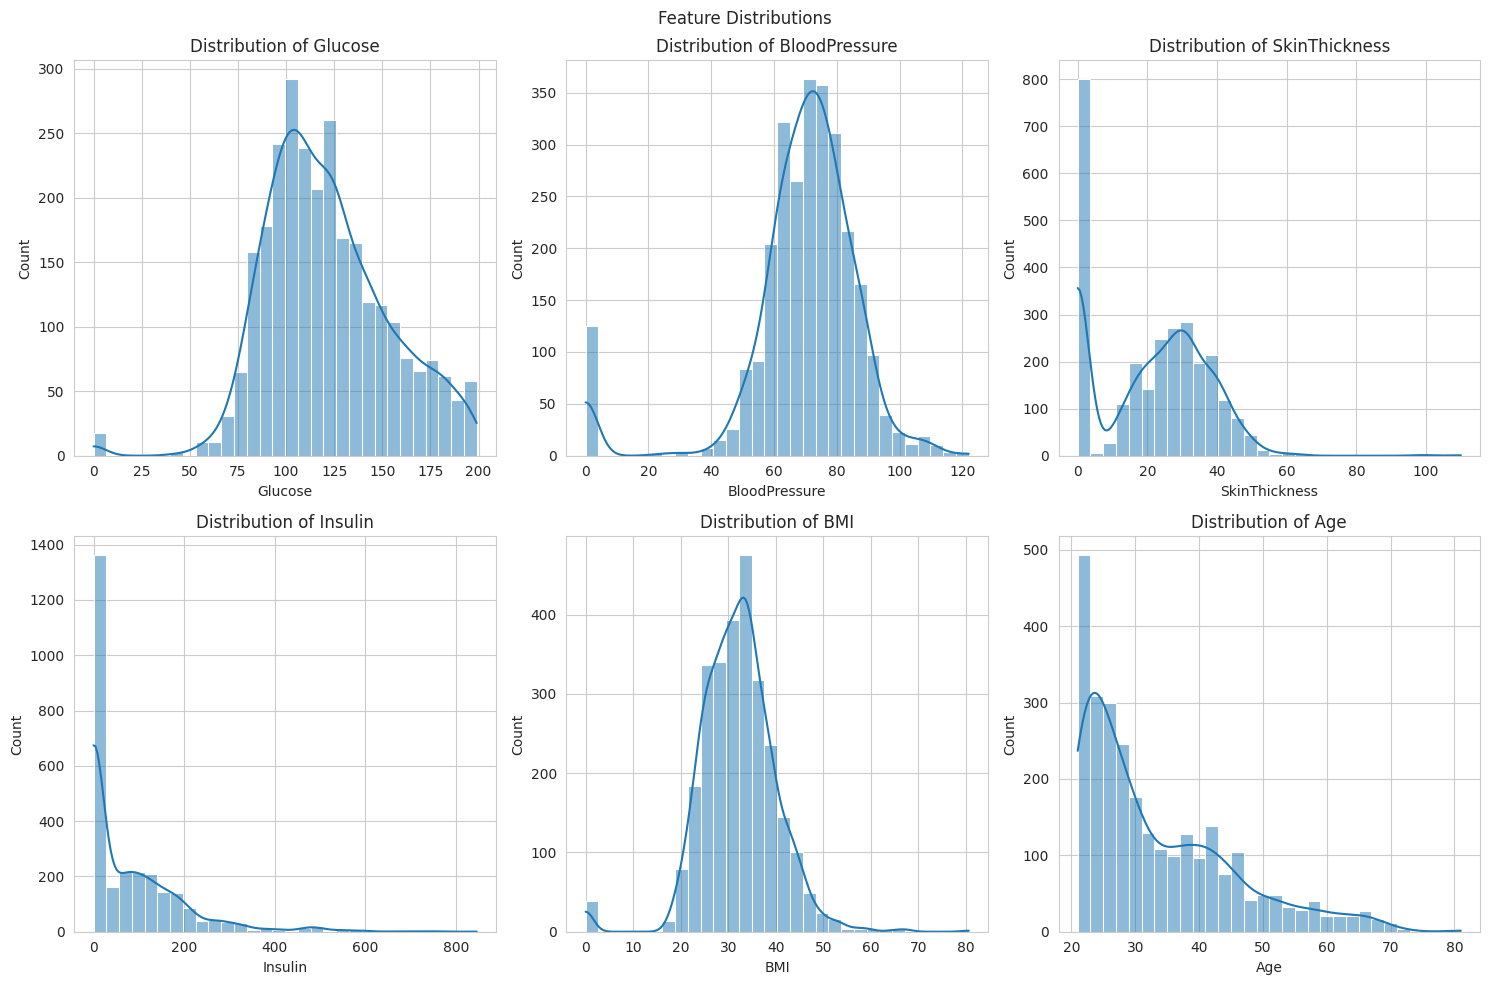

In [ ]:
#EDA Analysis
# Set Seaborn style
sns.set_style("whitegrid")

# Histogram for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions')

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Next we create box plots of columns comparing the diabetes outcomes of each column

<ipython-input-8-31feeb683e34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=ax, palette='viridis')
<ipython-input-8-31feeb683e34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=ax, palette='viridis')
<ipython-input-8-31feeb683e34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=ax, palette='viridis')
<ipython-input-8-31feeb683e34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

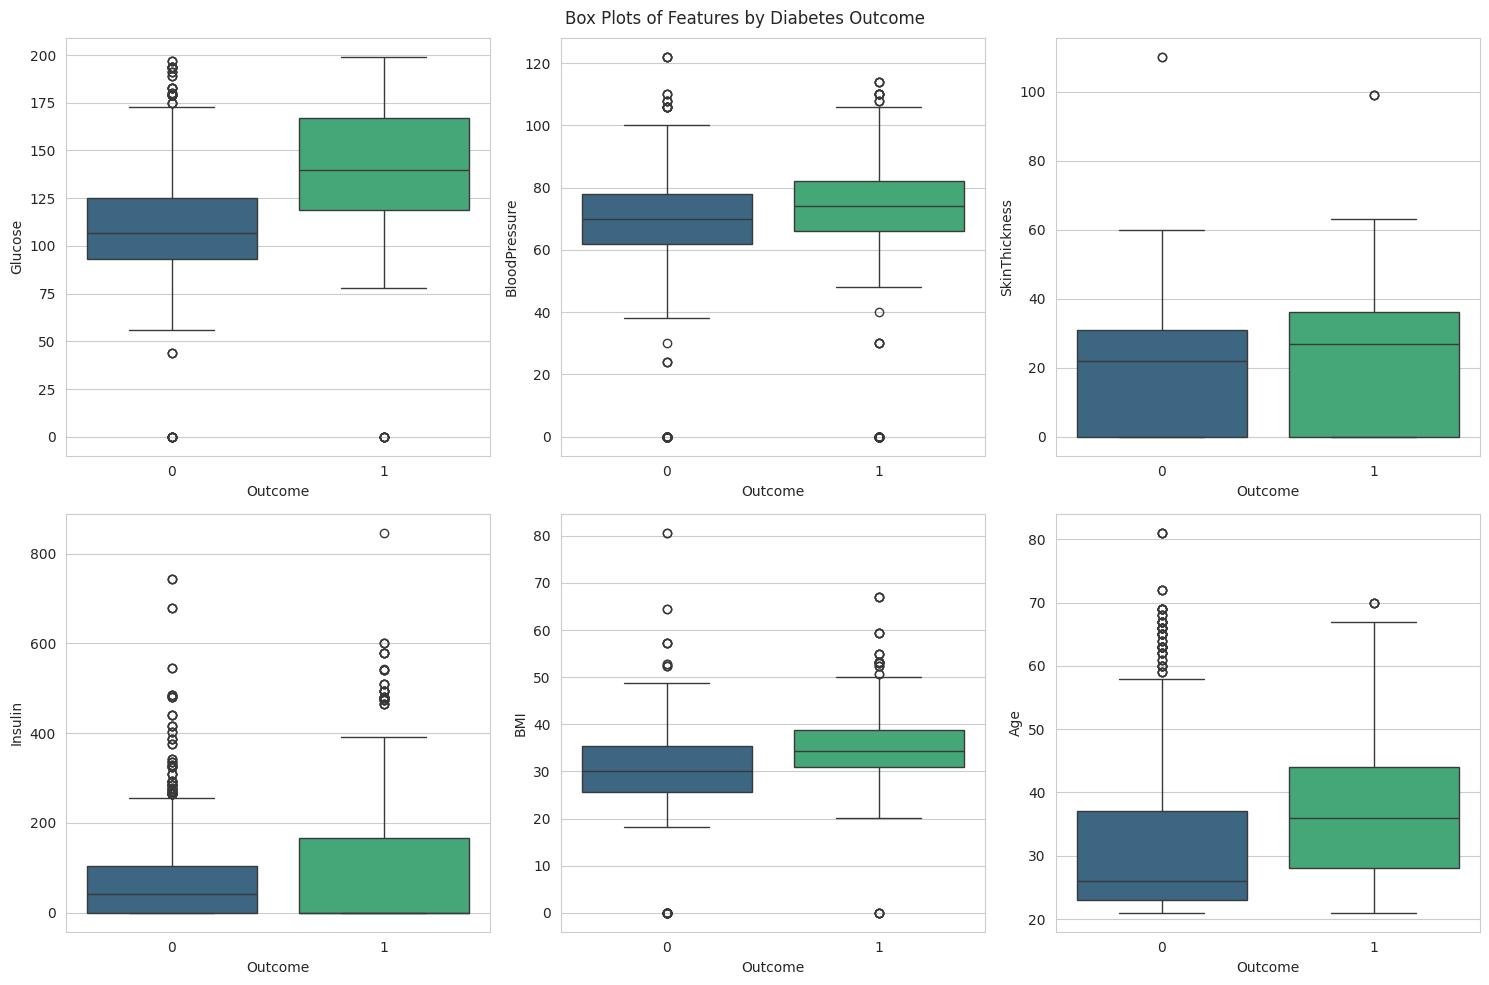

In [8]:

# Box plots for numerical features grouped by outcome
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Box Plots of Features by Diabetes Outcome')

for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(x='Outcome', y=col, data=df, ax=ax, palette='viridis')

plt.tight_layout()
plt.show()

Next, we do correlation analysis on the columns, this lets us know the closer the number is to 1 the more influential it is in a positive diabetes outcome

<ipython-input-9-de9f16bcfb0c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df['Correlation with Outcome'], y=correlation_df['Feature'], palette="viridis")


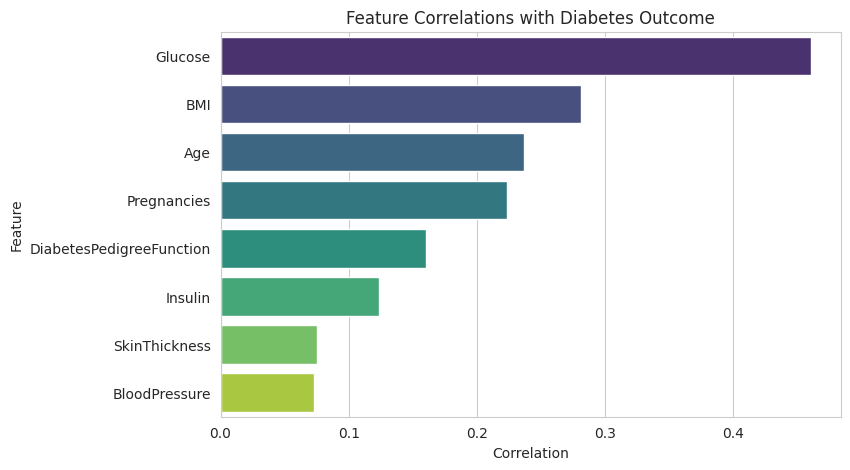

In [9]:

# Convert 'Outcome' back to integer for correlation analysis
df['Outcome'] = df['Outcome'].astype(int)

correlation_matrix = df.corr(numeric_only=True)
correlation_df = correlation_matrix["Outcome"].drop("Outcome").sort_values(ascending=False).reset_index()
correlation_df.columns = ["Feature", "Correlation with Outcome"]

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_df['Correlation with Outcome'], y=correlation_df['Feature'], palette="viridis")
plt.title("Feature Correlations with Diabetes Outcome")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

We create scatter plots to see the correlation of the top 3 columns to each other and diabetes outcomes.

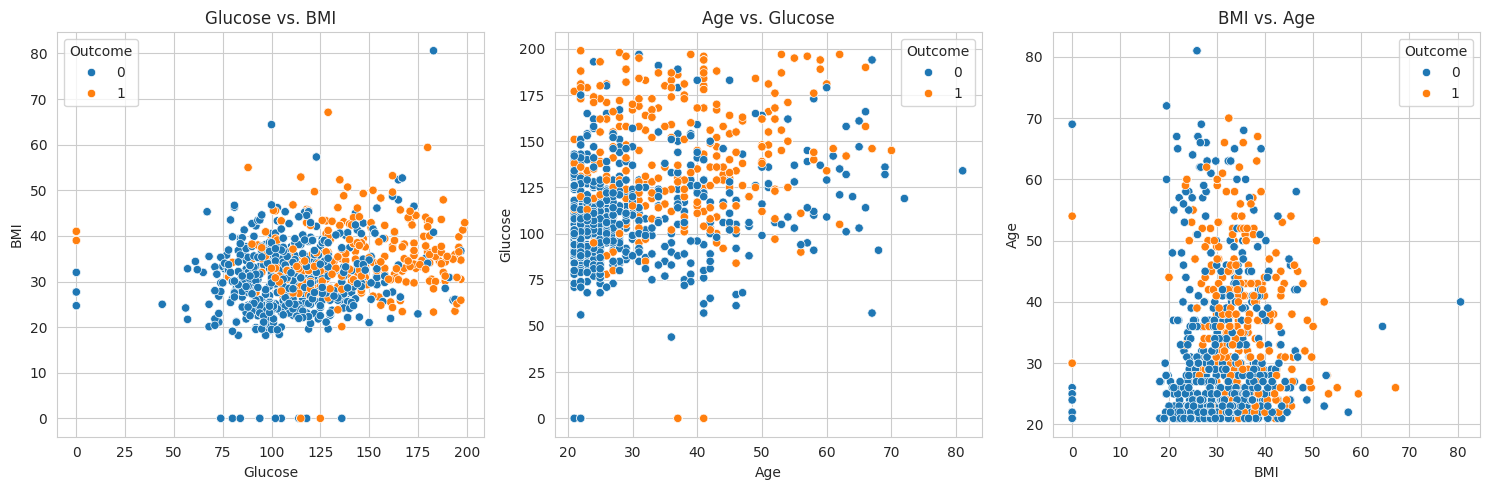

In [10]:
# Scatter Plots for Key Correlations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome'], ax=axes[0])
axes[0].set_title("Glucose vs. BMI")
sns.scatterplot(x=df['Age'], y=df['Glucose'], hue=df['Outcome'], ax=axes[1])
axes[1].set_title("Age vs. Glucose")
sns.scatterplot(x=df['BMI'], y=df['Age'], hue=df['Outcome'], ax=axes[2])
axes[2].set_title("BMI vs. Age")
plt.tight_layout()
plt.show()

The correlation coefficients show that glucose BMI and age are the three factors with the highest correlation for a positive diabetes outcome.

from the above charts we can see that both high glucose levels and a high BMI are a strong indication of diabetes, as well as higher age indicating an increased BMI and glucose level.

We now start the classification analysis and solutions.
first, we split the dataset into training and testing sets

In [11]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=["Outcome"])
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Train the random forest algorithm on the dataset, then plot the feature importance based on the algorithm results.  

Random Forest Model Accuracy: 1.00

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.99      0.99       191

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554



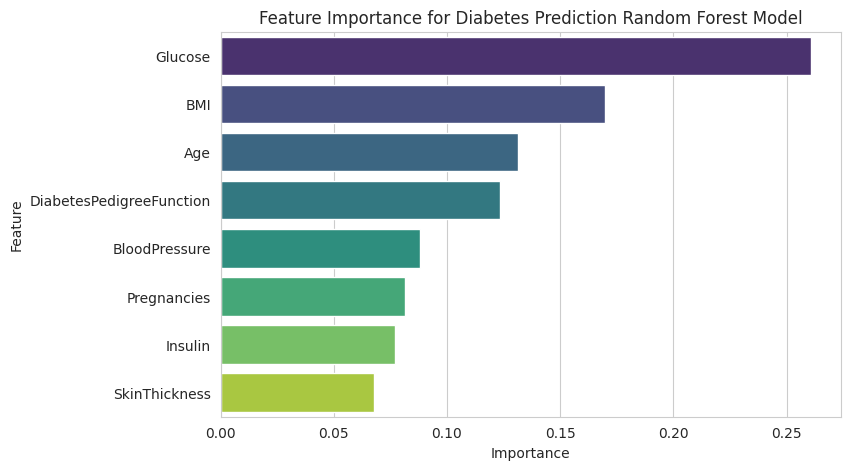

In [12]:

# Training a Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Model evaluation for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': model_rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_rf['Importance'], y=feature_importance_rf['Feature'], hue=feature_importance_rf['Feature'], palette="viridis", legend=False)
plt.title("Feature Importance for Diabetes Prediction Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Logistic Regression Model Accuracy: 0.77

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       363
           1       0.72      0.55      0.62       191

    accuracy                           0.77       554
   macro avg       0.75      0.72      0.73       554
weighted avg       0.77      0.77      0.76       554



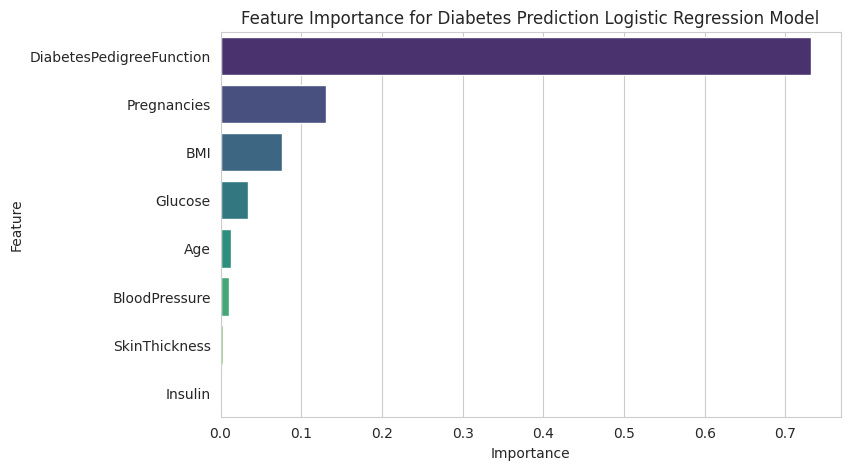

In [17]:
# Training a Logistic Regression Classifier
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Model evaluation for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Model Accuracy: {accuracy_lr:.2f}")
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Feature importance for Logistic Regression
feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model_lr.coef_[0])})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False)

# Plot feature importance for Logistic Regression
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_lr['Importance'], y=feature_importance_lr['Feature'], hue=feature_importance_lr['Feature'], palette="viridis", legend=False)
plt.title("Feature Importance for Diabetes Prediction Logistic Regression Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Compare the two models:

Random Forest Model Accuracy: 1.00

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.99      0.99       191

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554

Logistic Regression Model Accuracy: 0.77

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       363
           1       0.72      0.55      0.62       191

    accuracy                           0.77       554
   macro avg       0.75      0.72      0.73       554
weighted avg       0.77      0.77      0.76       554


Model Comparison Table:

                     Accuracy
Random Forest         0.99639
Logistic Regression  0.770758


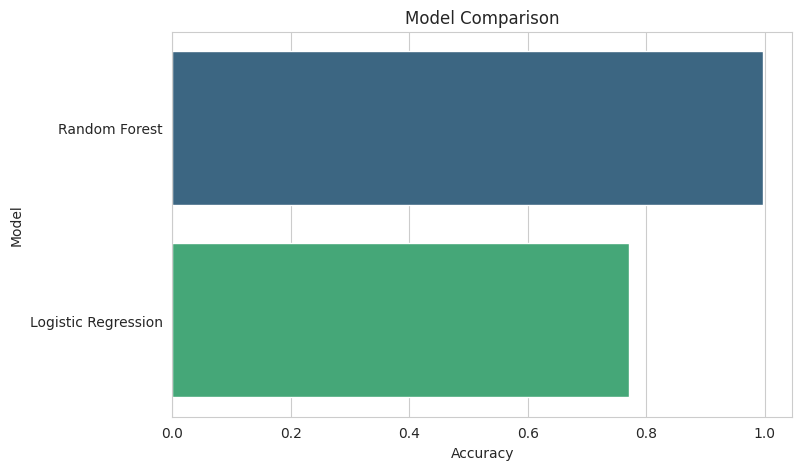

In [14]:
 # Multiple model evaluations
models = {
    "Random Forest": model_rf,
    "Logistic Regression": model_lr
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"{name} Model Accuracy: {accuracy:.2f}")
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

# Compare model performance
results_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[model]["accuracy"] for model in results]
})

# Display the results in a table format
results_table = pd.DataFrame(results).T
results_table = results_table[['accuracy']]
results_table.columns = ['Accuracy']
print("\nModel Comparison Table:\n")
print(results_table)

# Plot model comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", hue="Model", data=results_df, palette="viridis", legend=False)
plt.title("Model Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

### Model Testing
We give the model some test data and assess its accuracy.


In [ ]:
#New data
new_data = {
    'Pregnancies': [2, 4],
    'Glucose': [120, 150],
    'BloodPressure': [70, 80],
    'SkinThickness': [20, 25],
    'Insulin': [85, 90],
    'BMI': [30.0, 35.0],
    'DiabetesPedigreeFunction': [0.5, 0.6],
    'Age': [25, 65]
}

# Convert the new data to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Preprocess the new data (apply the same preprocessing steps as the training data)
# Handling missing null values using median imputation
new_data_df.fillna(df.median(), inplace=True)

# Ensure all numeric columns are correctly formatted
new_data_df[num_cols] = new_data_df[num_cols].apply(pd.to_numeric, errors='coerce')
new_data_df.dropna(inplace=True)

# Make predictions using the Random Forest model
new_data_predictions_rf = model_rf.predict(new_data_df)

# Display the predictions
print(f"Random Forest Model Predictions: {new_data_predictions_rf}")

# See the probabilities of each prediction
probabilities_rf = model_rf.predict_proba(new_data_df)
print(f"Random Forest Model Prediction Probabilities:\n{probabilities_rf}")

Random Forest Model Predictions: [0 1]
Random Forest Model Prediction Probabilities:
[[0.99 0.01]
 [0.33 0.67]]
